# IRIS FLOWER CLASSIFICATION

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#**Load the Dataset**

In [ ]:
df = pd.read_csv("Iris.csv")
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

#**Explore the dataset**

In [ ]:
print(df.head())
print(df.describe())
print(df['species'].value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

#**Visualize the data**

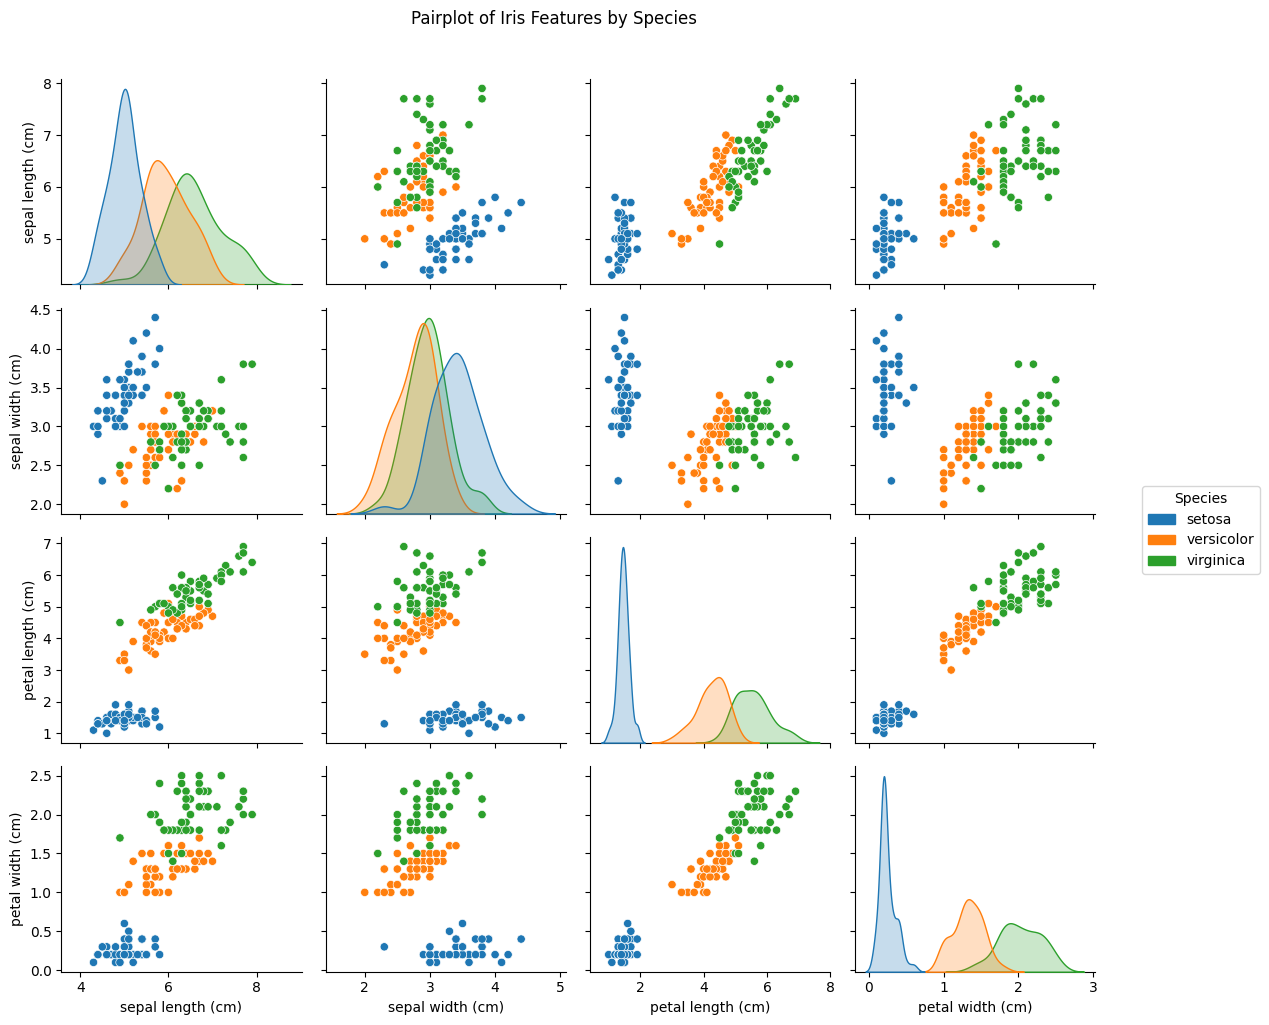

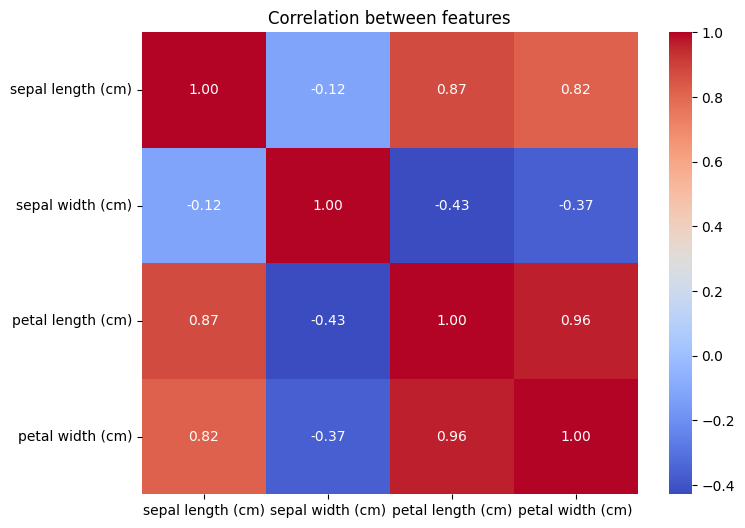

In [ ]:
from matplotlib.patches import Patch  # ✅ This is the missing import

# Pairplot
g = sns.pairplot(df, hue='species', diag_kind='kde', height=2.5)
g.fig.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.tight_layout()

# Custom legend colors
species_colors = {'setosa': '#1f77b4', 'versicolor': '#ff7f0e', 'virginica': '#2ca02c'}
handles = [Patch(color=color, label=label) for label, color in species_colors.items()]

# Remove and replace legend
if g._legend is not None:
    g._legend.remove()
g.fig.legend(handles=handles, title='Species', bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.show()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between features")
plt.show()

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logistic Regrestion

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

Decision Tree

In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)


DecisionTreeClassifier()

Random Forest

In [ ]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)


RandomForestClassifier()

SVC

In [ ]:
model4 = SVC()
model4.fit(X_train, y_train)


SVC()

Evaluate the model

In [ ]:
y_pred = model3.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

